In [1]:
import math

import cv2
from matplotlib import pyplot as plt


Test Poisson Sampling
Wygenerowano 285 punktów
Obszar: 100 x 100
Minimalna odległość: 5


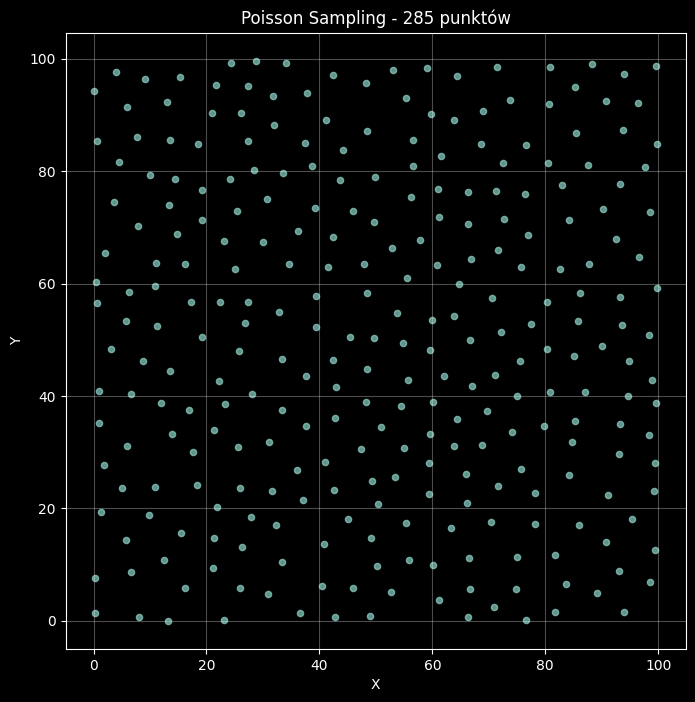


Pierwsze 5 punktów:
  1: (1.88, 27.72)
  2: (6.00, 31.03)
  3: (13.84, 33.30)
  4: (11.99, 38.66)
  5: (5.07, 23.60)


In [2]:
from src.functions.poisson_sampling import poisson_sampling

print("Test Poisson Sampling")
print("=" * 30)

width, height, r, k = 100, 100, 5, 30
points = poisson_sampling(width, height, r)

print(f"Wygenerowano {len(points)} punktów")
print(f"Obszar: {width} x {height}")
print(f"Minimalna odległość: {r}")

x_coords = [p[0] for p in points]
y_coords = [p[1] for p in points]

plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, s=20, alpha=0.7)
plt.xlim(0, width)
plt.ylim(0, height)
plt.title(f'Poisson Sampling - {len(points)} punktów')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print(f"\nPierwsze 5 punktów:")
for i, (x, y) in enumerate(points[:5]):
    print(f"  {i+1}: ({x:.2f}, {y:.2f})")

In [3]:
import noise
import numpy as np
from src.utils.classes.nuclei import Nuclei


class TestNuclei(Nuclei):
    def __init__(self, center, axes, angle=0, color=(160, 83, 179), thickness=-1, irregularity=0.3, border_color=(107, 26, 121), border_thickness=2):
        super().__init__(center, axes, angle, color, thickness)
        self.irregularity = irregularity
        self.border_color = border_color
        self.border_thickness = border_thickness
        self.seed = np.random.randint(0, 100)

    def draw_nuclei(self, image):
        cx, cy = self.center
        ax, ay = self.axes
        angle = np.deg2rad(self.angle)

        points = []
        num_points = 1000

        for i in range(num_points):
            t = 2 * math.pi * i / num_points
            x = ax * np.cos(t)
            y = ay * np.sin(t)

            perlin_value = noise.pnoise1(t * 2.0,
                                         octaves=4,
                                         persistence=0.5,
                                         lacunarity=3.0,
                                         repeat=1024,
                                         base=self.seed)
            factor = 1 + self.irregularity * perlin_value

            x *= factor
            y *= factor

            xr = x * np.cos(angle) - y * np.sin(angle)
            yr = x * np.sin(angle) + y * np.cos(angle)

            points.append([int(cx + xr), int(cy + yr)])

        points = np.array(points, dtype=np.int32).reshape((-1, 1, 2))
        cv2.fillPoly( image, [points], self.color )
        if self.border_thickness > 0:
            cv2.polylines(image, [points], isClosed=True, color=self.border_color, thickness=self.border_thickness)


In [4]:
from src.functions.ellipse_params import ellipse_proportion

image = np.zeros((300, 300, 3),   dtype=np.uint8)

n3 = TestNuclei((130,130), ellipse_proportion(50),irregularity=0.1,thickness=2)

n3.draw_nuclei(image)

cv2.imshow('Nucleus', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
from src.utils.classes.cancer_nucleus import CancerNucleus

image = np.zeros((300, 300, 3),   dtype=np.uint8)

n3 = CancerNucleus((130,130), ellipse_proportion(50),irregularity=0.1,thickness=2)

n3.draw_nuclei(image)

cv2.imshow('Nucleus', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
from src.data_generation.picture_generator import generate_picture_with_Poisson_sampling

image = generate_picture_with_Poisson_sampling(500, 500, proportionally=False)
cv2.imshow('generator', image)
cv2.waitKey(0)
cv2.destroyAllWindows()